In [30]:
import numpy as np
me_GaAs = 0.067 #assumes GaAs at 300K
eVperJ = 6.241509e18 #Joule per Volt, elementary charge
me = 9.1093837e-31 #kg, electron mass
meff = me * me_GaAs #effective mass in GaAs at 300K
hbar = 1.0545718e-34 #Joule second, reduced Planck's constant

# hbar_eVs = 6.582e-16
n_invcm = 10**13 #2D density/cm^2
n = n_invcm*10000 #in m^-2
mu_J = n*np.pi*hbar**2/meff
mu = mu_J*eVperJ
print("mu =" + str(mu) + "eV")


mu =0.3572958592545923eV


In [31]:
#higher mu
deltaE1E2_eV = 0.159 #meV, energy difference between first and second subband
deltaE1E2_J = deltaE1E2_eV/eVperJ
muhigher = n*np.pi*hbar**2/(2*meff)-(deltaE1E2_J/2)
muhigher_eV = muhigher*eVperJ
print("muhigher =" + str(muhigher_eV) + "eV")

muhigher =0.09914792962729614eV


<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
/var/folders/4g/svln6v_d2710ndrj3tsk7x4c0000gn/T/ipykernel_28184/1435939933.py:41: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Density of States $g(E)$ and Fermi Function $f(E - \mu)$", fontsize=16)


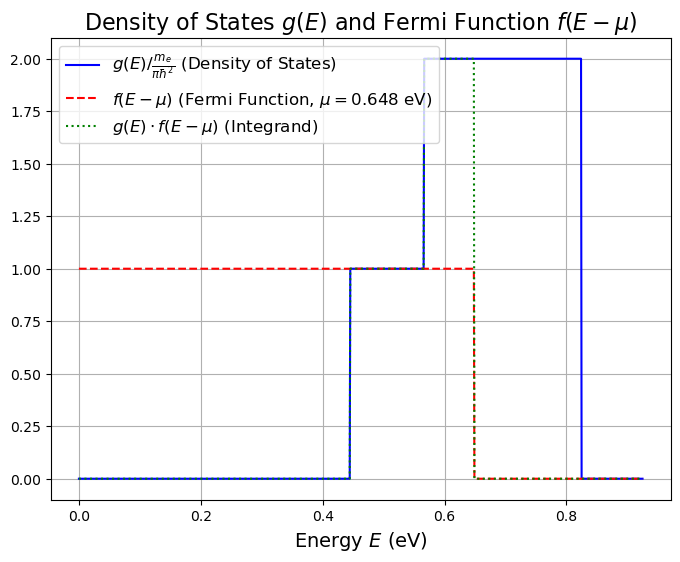

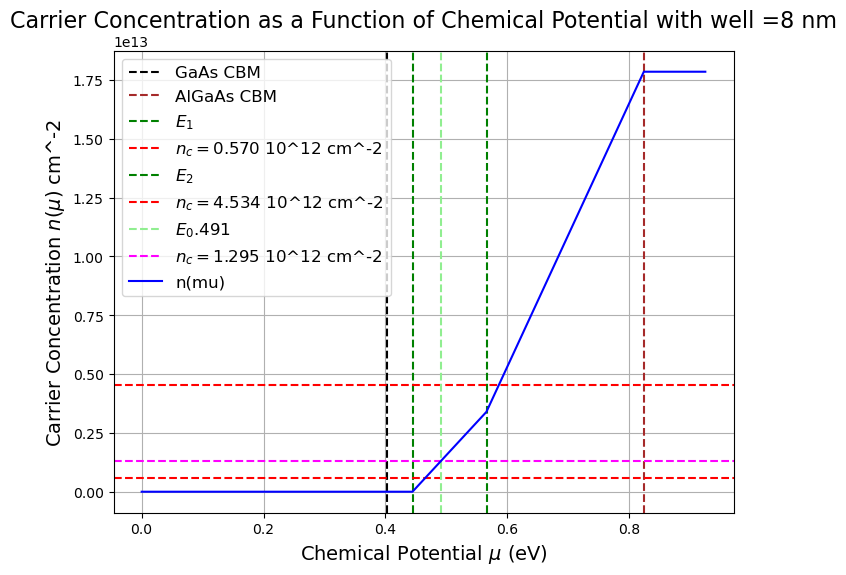

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

well_l = 8 #nm
CBM = 4.020731028571427612e-1  # Conduction Band Minimum from ErwinJr2
AlGaAs_CBM = 8.248e-1
well_energy_dict = {
    8: [42.3495e-3 +CBM,164.228e-3 +CBM],
    10: [4.333901469808462137e-1, 5.330882227046231936e-1, 6.737103286465871976e-1], 
    5: [4.919122188403115548e-1, 7.185018964232161576e-1],  
    7: [4.574310101835000753e-01, 6.164996987405100271e-01],  
    3: [5.655013161901885077e-01]
}
energy_levels = well_energy_dict[well_l] # E1, E2, E3 relative to CBM
dos_values = np.arange(len(energy_levels))+1
# dos_values = [1, 2, 3]  # Corresponding density of states for each level

gdims = meff/(np.pi*hbar**2)

# Define the density of states function g(E) based on the energy levels
def g(E): #without numerical factor
    if E> AlGaAs_CBM:
        return 0
    for i, E_level in enumerate(energy_levels):
        if E_level <= E < (energy_levels[i + 1] if i + 1 < len(energy_levels) else AlGaAs_CBM):
            return dos_values[i]
    return 0  # No states outside the defined levels

# Define the Fermi-Dirac distribution at T=0K
def f(E, mu):
    # Step function approximation for T=0K
    return 1 if E <= mu else 0

def plotIntegrand(E_values,g_values,f_values,g_f_prod,mu):
    fig = plt.figure(figsize=(8, 6))
    plt.plot(E_values, g_values, label=r"$g(E)/\frac{m_e}{\pi \hbar^2}$ (Density of States)", color="blue")
    plt.plot(E_values, f_values, label=fr"$f(E - \mu)$ (Fermi Function, $\mu={mu:.3f}$ eV)", color="red", linestyle="--")
    plt.plot(E_values, g_f_prod, label=r"$g(E) \cdot f(E - \mu)$ (Integrand)", color="green", linestyle=":")
    plt.xlabel(r"Energy $E$ (eV)", fontsize=14)
    # plt.ylabel("Value", fontsize=14)
    plt.title("Density of States $g(E)$ and Fermi Function $f(E - \mu)$", fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=12)
    return fig
    

# Plot g(E) and f(E - mu) for a specific mu
E_values = np.linspace(0, AlGaAs_CBM+0.1, 1000)  # Energy range
g_values_dimensionless = np.array([g(E) for E in E_values])  # Evaluate g(E)

# Define the range of chemical potentials (mu)
mu_values = E_values

# Calculate n(mu) by integrating g(E) from 0 to mu
ns_invm2 = np.array([])  # Initialize an empty array to store carrier concentrations
for mu_ind in range(0,len(mu_values)):
    mu = mu_values[mu_ind]  # Current chemical potential
    # Perform numerical integration of g(E) from 0 to mu
    f_values = np.array([f(E, mu) for E in E_values])  # Evaluate f(E - mu)
    g_f_prod = f_values*g_values_dimensionless
    
    if mu_ind == 700:
        fig_check = plotIntegrand(E_values,g_values_dimensionless,f_values,g_f_prod,mu)
        plt.show(fig_check)

    n_gimdimensionless_eV = np.trapz(g_f_prod, E_values)  # Numerical integration using trapezoidal rule #already includes dimension
    n_invm2 = n_gimdimensionless_eV * gdims /eVperJ  # carrier concentration in m^-2
    ns_invm2 = np.append(ns_invm2,n_invm2)

ns_invcm2 = ns_invm2/10**4

plt.figure(figsize=(8, 6))
plt.axvline(x=CBM, color="black", linestyle="--", label="GaAs CBM")
plt.axvline(x=AlGaAs_CBM, color="brown", linestyle="--", label="AlGaAs CBM")

buffer_mu = 20e-3
closest_n_values = {}

for energy_ind in range(0,len(energy_levels)):

    mus_buffered = mu_values - buffer_mu
    closest_index = np.argmin(np.abs(mus_buffered - energy_levels[energy_ind]))
    closest_n = ns_invcm2[closest_index]
    closest_n_values[energy_levels[energy_ind]] = closest_n

    plt.axvline(x=energy_levels[energy_ind], color="green", linestyle="--", label=fr"$E_{energy_ind+1:d}$")
    plt.axhline(y=closest_n, color="red", linestyle="--", label=fr"$n_c = {closest_n/1e12:.3f}$ 10^12 cm^-2")


chem_pot_aestimo = 88.62e-3+CBM
closest_index_chem_pot = np.argmin(np.abs(mu_values - chem_pot_aestimo))
closest_n = ns_invcm2[closest_index_chem_pot]

plt.axvline(x=chem_pot_aestimo, color="lightgreen", linestyle="--", label=fr"$E_{chem_pot_aestimo:.3f} eV$")
plt.axhline(y=closest_n, color="magenta", linestyle="--", label=fr"$n_c = {closest_n/1e12:.3f}$ 10^12 cm^-2")

# closest_index = np.argmin(np.abs(mu_values - buffer_mu - energy_levels[energy_ind]))
# closest_n = ns_invcm2[closest_index]
# closest_n_values[energy_levels[energy_ind]] = closest_n

# plt.axvline(x=energy_levels[energy_ind], color="green", linestyle="--", label=fr"$E_{energy_ind+1:d}$")
# plt.axhline(y=closest_n, color="red", linestyle="--", label=fr"$n_c = {closest_n/1e12:.3f}$ 10^12 cm^-2")

plt.plot(mu_values, ns_invcm2, label=r"n(mu)", color='blue')
plt.xlabel(r"Chemical Potential $\mu$ (eV)", fontsize=14)
plt.ylabel(r"Carrier Concentration $n(\mu)$ cm^-2", fontsize=14)
plt.title(fr"Carrier Concentration as a Function of Chemical Potential with well ={well_l:d} nm", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [33]:
well_l_cm = well_l/1e7  # Convert well length from nm to cm
n_invcm3 = 0.5e13/well_l_cm
print(f"n_invcm3 = {n_invcm3:.2e} cm^-3 for well length {well_l} nm")

n_invcm3 = 6.25e+18 cm^-3 for well length 8 nm


In [34]:
print("NumPy version:", np.__version__)

NumPy version: 1.26.4
